<a href="https://colab.research.google.com/github/tomonabe/PK/blob/main/R%E3%81%A7PK%E8%A7%A3%E6%9E%90_1%E5%B9%B4%E7%94%9F%E8%96%AC%E5%AD%A6%E6%A6%82%E8%AB%96%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google ColabでR　１年生薬学概論用

# グーグルコラボにアクセス
# https://colab.research.google.com/github/tomonabe/PK/blob/main/RでPK解析_1年生薬学概論用.ipynb
# グーグルのアカウント（Gmailアドレスとパスワード）でログインする

In [ ]:
# Rを電卓のように使ってみる

1 + 2  # Shift+Return

[1] 3

In [ ]:
2 * 3

[1] 6

In [ ]:
2 ^ 4  # 2*2*2*2

[1] 16

In [ ]:
2 ^ 50

[1] 1.1259e+15

In [ ]:
sqrt(2)

[1] 1.414214

In [ ]:
log(10)  # ln10

[1] 2.302585

In [ ]:
log10(100)  # log100

[1] 2

In [ ]:
# Rで統計

a <- c(2, 3, 4, 5, 6, 7, 8)

In [ ]:
a

[1] 2 3 4 5 6 7 8

In [ ]:
a <- a * 10

In [ ]:
a

[1] 20 30 40 50 60 70 80

In [ ]:
sum(a)

[1] 350

In [ ]:
mean(a)

[1] 50

In [ ]:
sd(a)

[1] 21.60247

In [ ]:
b <- c(47, 48, 49, 50, 51, 52, 53)

In [ ]:
b

[1] 47 48 49 50 51 52 53

In [ ]:
mean(b)

[1] 50

In [ ]:
sd(b)

[1] 2.160247

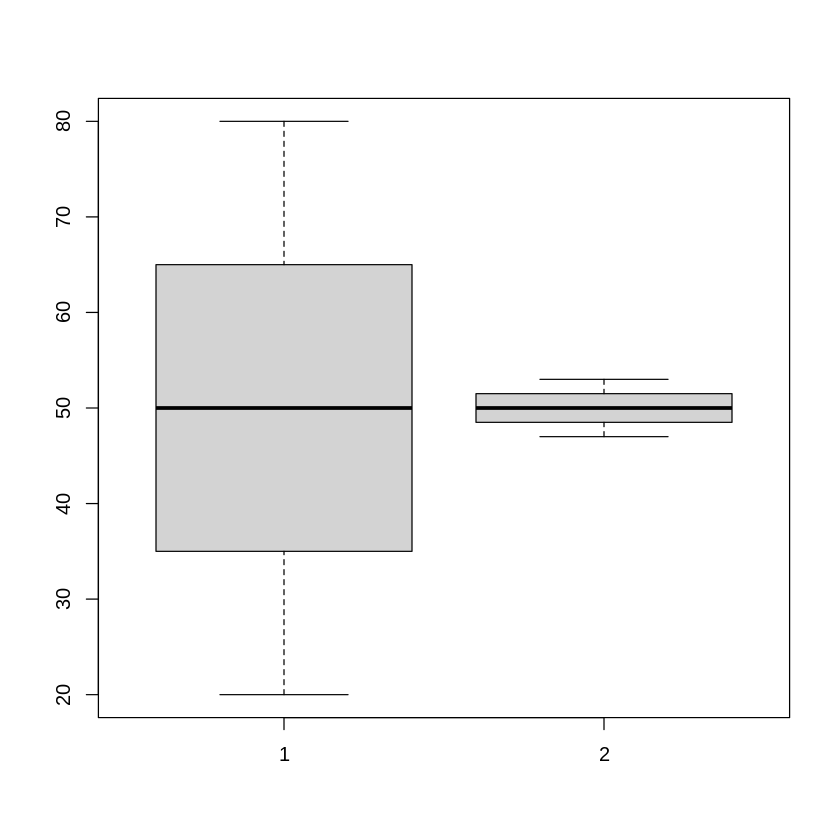

In [ ]:
boxplot(a, b)

In [ ]:
# RでPK解析Simulation

# mrgsolveパッケージをインストール
install.packages("mrgsolve")
library(mrgsolve)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppArmadillo’, ‘BH’



Attaching package: ‘mrgsolve’


The following object is masked from ‘package:stats’:

    filter




In [ ]:
# 1-コンパートメントモデル経口投与
code<-" 
$PARAM
Ke = 0.15, Vd = 10, Ka = 0.8
$INIT
Xa=10, X=0
$ODE
dxdt_Xa = -Ka*Xa;
dxdt_X = Ka*Xa - Ke*X;
$CAPTURE
C = X/Vd; "

Building oral ... 
done.



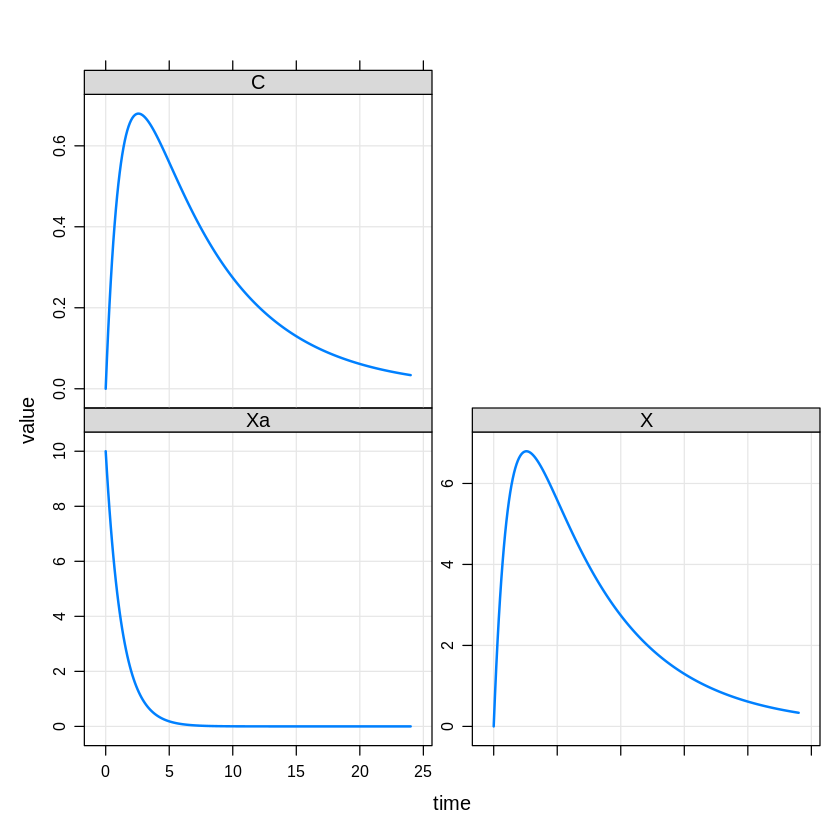

In [ ]:
# グラフを描く
mod<-mcode("oral", code) %>% update(end = 24, delta = 0.1)
mod %>% mrgsim %>% plot

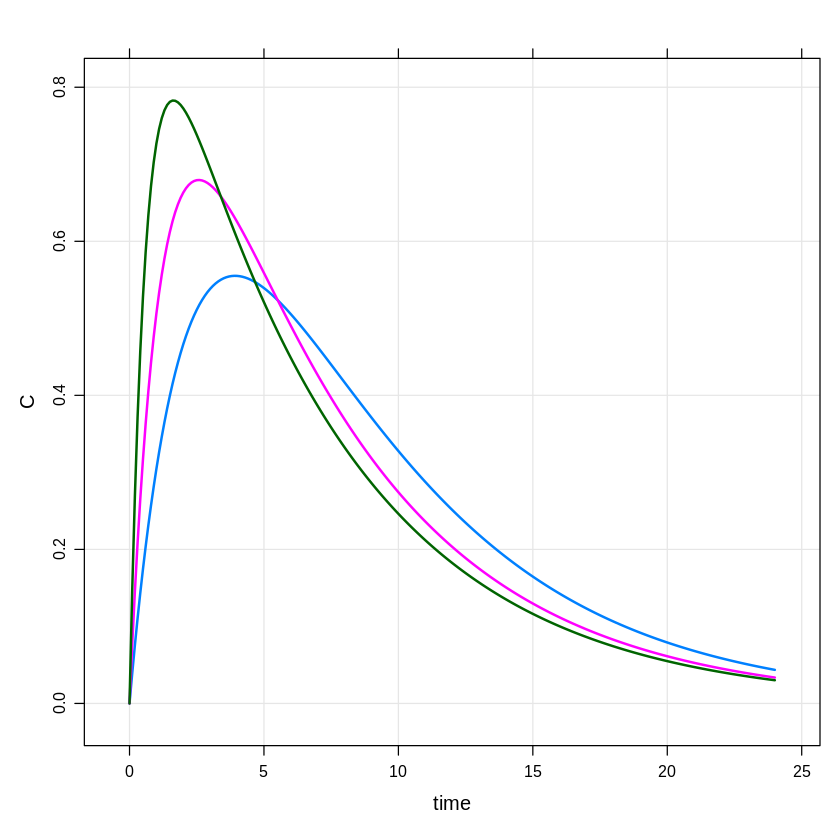

In [ ]:
# Kaを変化させてみる
idataka <- expand.idata(Ka = c(0.4, 0.8, 1.6))
out <- 
  mod %>% 
  idata_set(idataka) %>% 
  mrgsim(end=24)
plot(out, C~time)

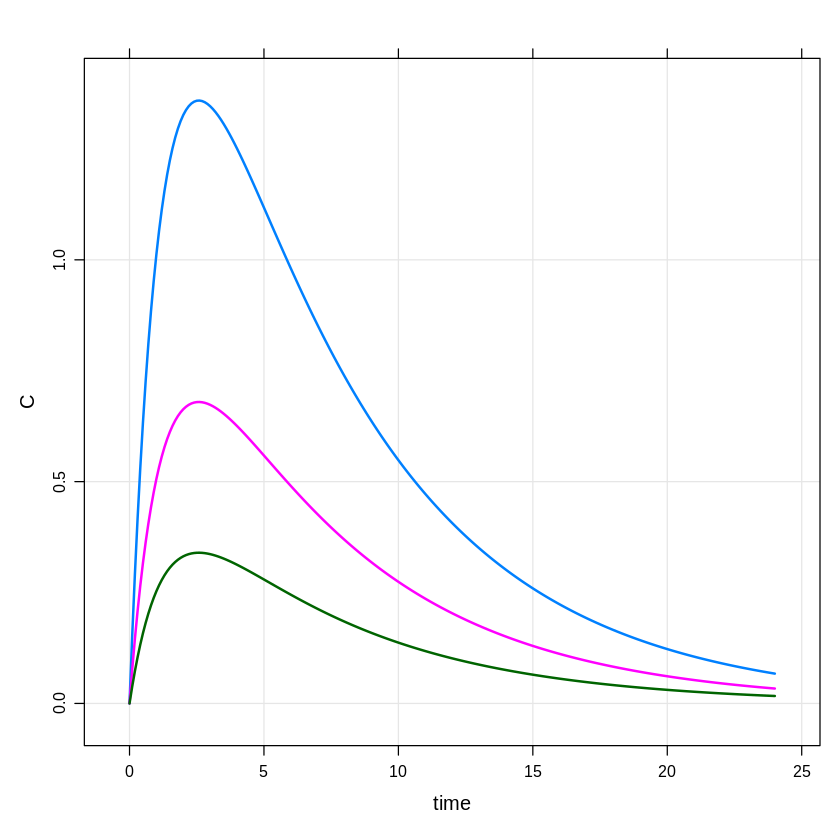

In [ ]:
# Vdを変化させてみる
idatavd <- expand.idata(Vd = c(5, 10, 20))
out <- 
  mod %>% 
  idata_set(idatavd) %>% 
  mrgsim(end=24)
plot(out, C~time)

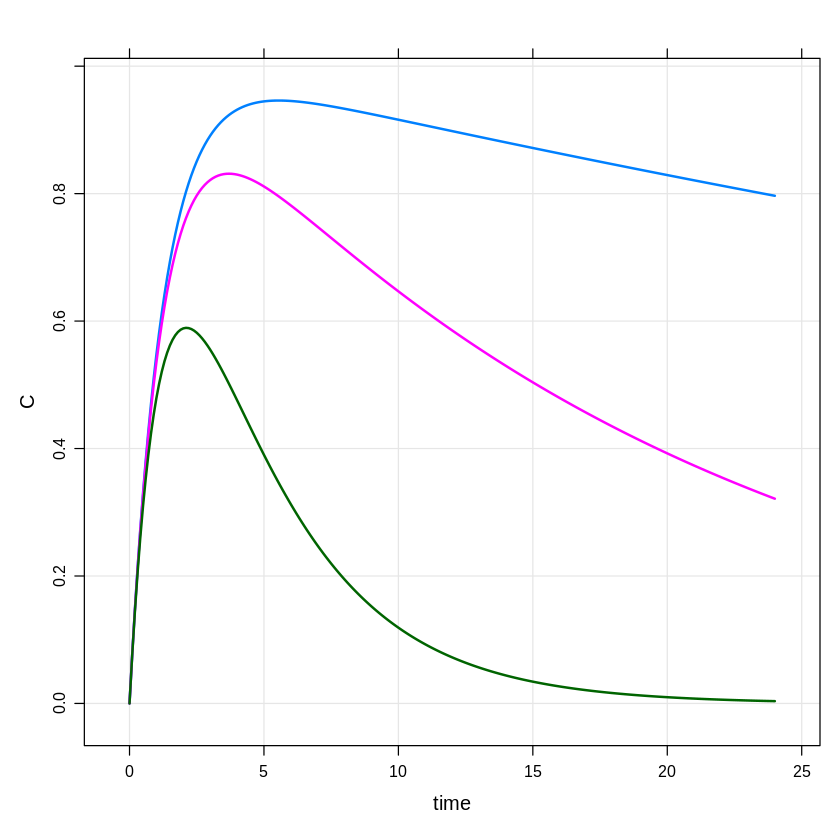

In [ ]:
# Keを変化させてみる
idatake <- expand.idata(Ke = c(0.01, 0.05, 0.25))
out <- 
  mod %>% 
  idata_set(idatake) %>% 
  mrgsim(end=24)
plot(out, C~time)

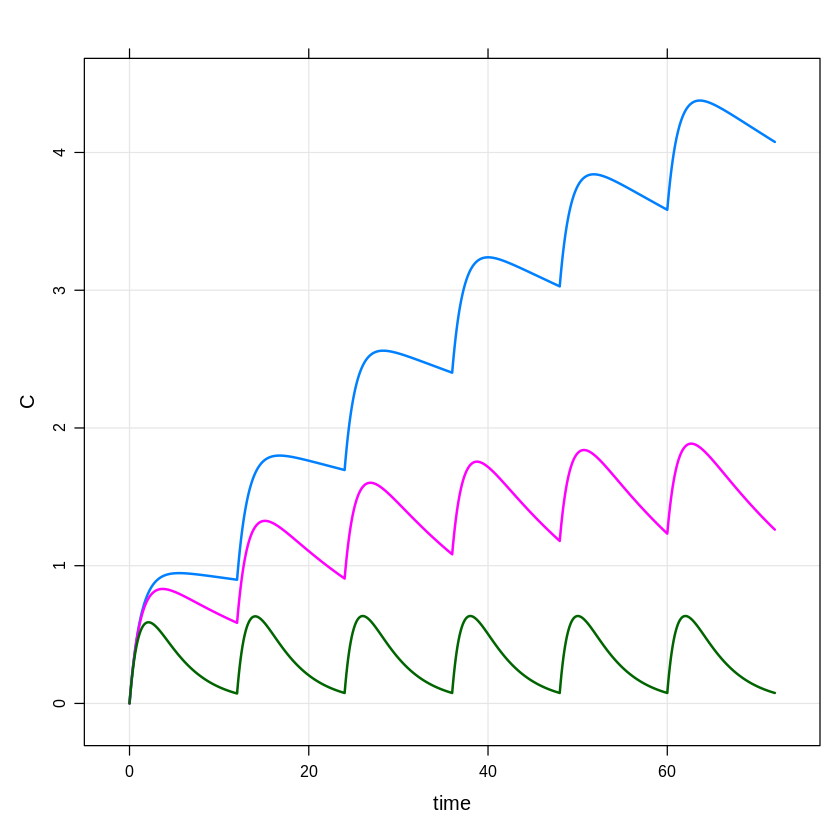

In [ ]:
# Keが異なる患者へ12時間ごと10 mg繰り返し投与3日間
idatake <- expand.idata(Ke = c(0.01, 0.05, 0.25))
mod %>% init(Xa=0) %>%
  ev_rx("10 q 12 x 6") %>%
  idata_set(idatake) %>% 
  mrgsim(end = 72, delta = 0.1) %>% 
  plot(C~time)

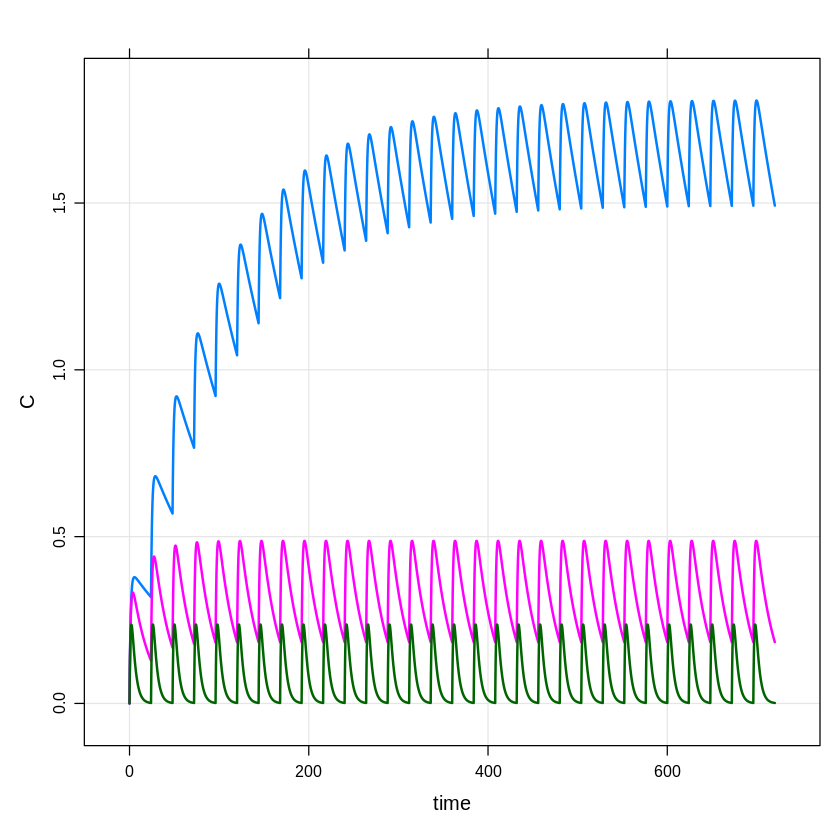

In [ ]:
# Keが異なる患者へ24時間ごと4 mg繰り返し投与30日間
idatake <- expand.idata(Ke = c(0.01, 0.05, 0.25))
mod %>% init(Xa=0) %>%
  ev_rx("4 q 24 x 30") %>%
  idata_set(idatake) %>% 
  mrgsim(end = 720, delta = 0.1) %>% 
  plot(C~time)

In [ ]:
# Ka、Ke、Vdなどの数字を変えて試してみてください
# 終了するときは、ブラウザ（のタブ）を閉じてください。何も保存されません
# 保存したいときは、次のようにしてください
# ファイル → ドライブにコピーを保存
# グーグルドライブに保存されます